In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sentence_transformers import SentenceTransformer
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [2]:
#!pip install sentence-transformers

  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125940 sha256=db7aba67b25b3a4ac484f54839f843df01245a003f2416cff24a37cd92be653c
  Stored in directory: c:\users\rajat.k.srivastava\appdata\local\pip\cache\wheels\71\67\06\162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [4]:
data = pd.read_csv('C://Users//rajat.k.srivastava//Downloads//imdb_top_1000.csv')
X = np.array(data.Overview)

In [5]:
data = data[['Genre','Overview','Series_Title']]
data.head()

,Genre,Overview,Series_Title
0,Drama,Two imprisoned men bond over a number of years...,The Shawshank Redemption
1,"Crime, Drama",An organized crime dynasty's aging patriarch t...,The Godfather
2,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,The Dark Knight
3,"Crime, Drama",The early life and career of Vito Corleone in ...,The Godfather: Part II
4,"Crime, Drama",A jury holdout attempts to prevent a miscarria...,12 Angry Men


In [7]:
text_data = X
model = SentenceTransformer('distilbert-base-nli-mean-tokens')
embeddings = model.encode(text_data, show_progress_bar=True)

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/265M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/450 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Batches:   0%|          | 0/32 [00:00<?, ?it/s]

In [9]:
embed_data = embeddings
X = np.array(embed_data)
n_comp = 5
pca = PCA(n_components=n_comp)
pca.fit(X)
pca_data = pd.DataFrame(pca.transform(X))
pca_data.head()

,0,1,2,3,4
0,2.986182,1.695354,4.334609,-2.355642,2.238135
1,-0.131722,0.887945,4.695523,-2.714149,-1.791358
2,-5.688415,-1.776776,-0.750545,-0.705974,4.125356
3,-1.211431,4.458774,1.582345,-3.536618,-2.343851
4,-0.971364,-2.374319,3.172212,3.072875,-0.171468


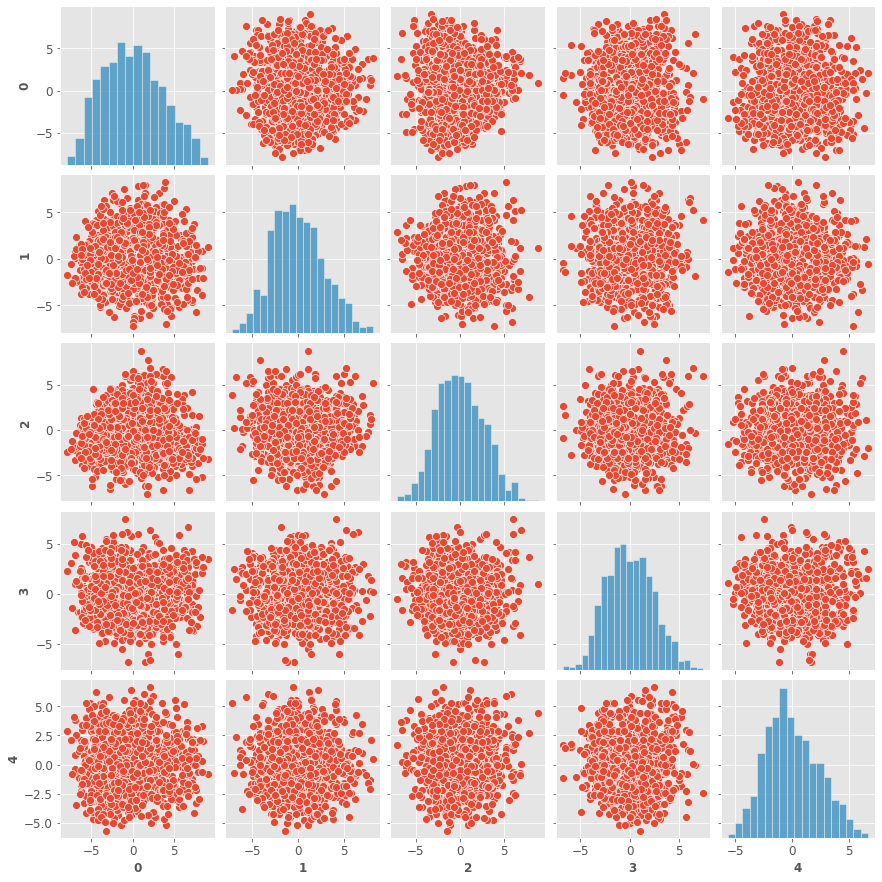

In [10]:
sns.pairplot(pca_data)

In [12]:
cos_sim_data = pd.DataFrame(cosine_similarity(X))
cos_sim_data 

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.550392,0.350035,0.421647,0.463880,0.408423,0.515788,0.353916,0.387551,0.317381,...,0.305638,0.366210,0.417200,0.488904,0.500020,0.372190,0.415689,0.435626,0.387703,0.394108
1,0.550392,1.000000,0.500683,0.786400,0.515959,0.494177,0.590944,0.616865,0.669451,0.522403,...,0.572684,0.527550,0.541616,0.561910,0.610282,0.562430,0.462835,0.591016,0.463929,0.667192
2,0.350035,0.500683,1.000000,0.558545,0.485291,0.561352,0.590945,0.544381,0.676872,0.625680,...,0.661857,0.611165,0.603801,0.519504,0.566178,0.445672,0.289652,0.492818,0.425312,0.695630
3,0.421647,0.786400,0.558545,1.000000,0.406723,0.457717,0.692699,0.603844,0.589853,0.588153,...,0.600036,0.524070,0.504667,0.470645,0.616529,0.598617,0.459036,0.541068,0.424762,0.571338
4,0.463880,0.515959,0.485291,0.406723,1.000000,0.492655,0.455883,0.449242,0.564627,0.465197,...,0.435063,0.444267,0.510465,0.526206,0.521250,0.410175,0.308236,0.530084,0.403962,0.613202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.372190,0.562430,0.445672,0.598617,0.410175,0.247875,0.504041,0.528952,0.522888,0.526840,...,0.403573,0.463685,0.461474,0.568742,0.617731,1.000000,0.290021,0.626848,0.394188,0.555140
996,0.415689,0.462835,0.289652,0.459036,0.308236,0.368696,0.568177,0.396031,0.323748,0.351758,...,0.564020,0.374122,0.374286,0.461643,0.425178,0.290021,1.000000,0.418450,0.358423,0.317991
997,0.435626,0.591016,0.492818,0.541068,0.530084,0.438132,0.597036,0.573586,0.574997,0.541618,...,0.587392,0.519467,0.467826,0.600152,0.681106,0.626848,0.418450,0.999999,0.623554,0.574718
998,0.387703,0.463929,0.425312,0.424762,0.403962,0.478383,0.565744,0.569549,0.522156,0.513807,...,0.550375,0.575349,0.347167,0.529319,0.477487,0.394188,0.358423,0.623554,1.000000,0.486595


In [25]:
#def give_recommendations(index,print_recommendation = False,print_recommendation_plots= False,print_genres =False):
index_recomm =cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
movies_recomm =  data['Series_Title'].loc[index_recomm].values
result = {'Movies':movies_recomm,'Index':index_recomm}
print(index_recomm)
print(movies_recomm)
print(result)

[533, 656, 759, 374, 859]
['Manhattan' 'Breaking the Waves' 'Changeling' 'Kal Ho Naa Ho' 'Repulsion']
{'Movies': array(['Manhattan', 'Breaking the Waves', 'Changeling', 'Kal Ho Naa Ho',
       'Repulsion'], dtype=object), 'Index': [533, 656, 759, 374, 859]}


In [26]:
 def give_recommendations(
    index,
    print_recommendation=False,
    print_recommendation_plots=False,
    print_genres=False,
):
    index_recomm = (
        cos_sim_data.loc[index].sort_values(ascending=False).index.tolist()[1:6]
    )
    movies_recomm = data["Series_Title"].loc[index_recomm].values
    result = {"Movies": movies_recomm, "Index": index_recomm}
    if print_recommendation == True:
        print(
            "The watched movie is this one: %s \n" % (data["Series_Title"].loc[index])
        )
        k = 1
        for movie in movies_recomm:
            print("The number %i recommended movie is this one: %s \n" % (k, movie))
    if print_recommendation_plots == True:
        print(
            "The plot of the watched movie is this one:\n %s \n"
            % (data["Overview"].loc[index])
        )
        k = 1
        for q in range(len(movies_recomm)):
            plot_q = data["Overview"].loc[index_recomm[q]]
            print(
                "The plot of the number %i recommended movie is this one:\n %s \n"
                % (k, plot_q)
            )
            k = k + 1
    if print_genres == True:
        print(
            "The genres of the watched movie is this one:\n %s \n"
            % (data["Genre"].loc[index])
        )
        k = 1
        for q in range(len(movies_recomm)):
            plot_q = data["Genre"].loc[index_recomm[q]]
            print(
                "The plot of the number %i recommended movie is this one:\n %s \n"
                % (k, plot_q)
            )
            k = k + 1
    return result


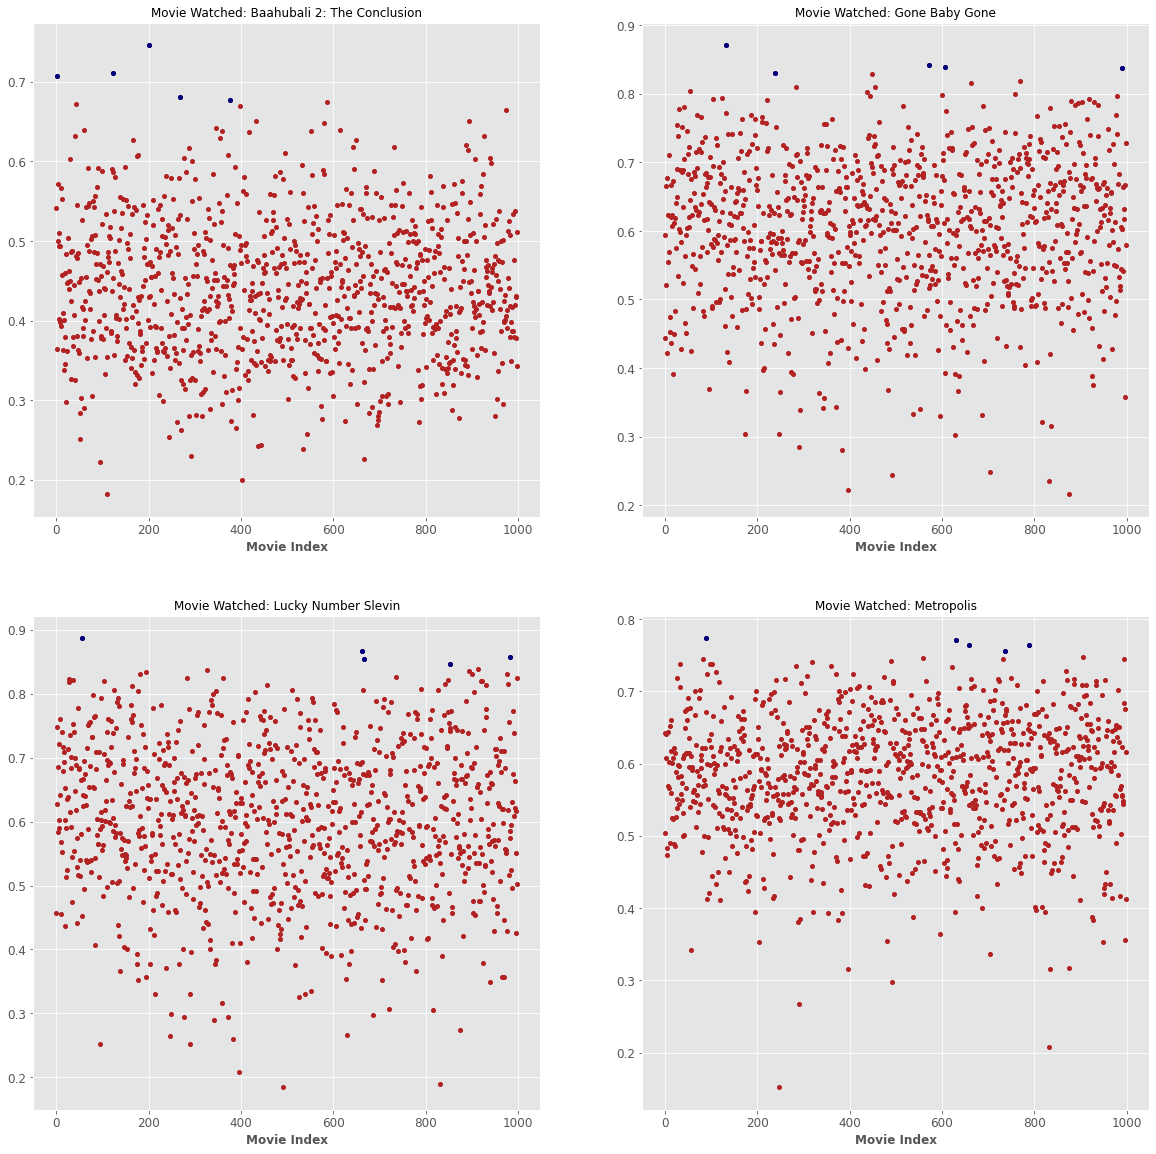

In [27]:
plt.figure(figsize=(20,20))
for q in range(1,5):
    plt.subplot(2,2,q)
    index = np.random.choice(np.arange(0,len(X)))
    to_plot_data = cos_sim_data.drop(index,axis=1)
    plt.plot(to_plot_data.loc[index],'.',color='firebrick')
    recomm_index = give_recommendations(index)
    x = recomm_index['Index']
    y = cos_sim_data.loc[index][x].tolist()
    m = recomm_index['Movies']
    plt.plot(x,y,'.',color='navy',label='Recommended Movies')
    plt.title('Movie Watched: '+data['Series_Title'].loc[index])
    plt.xlabel('Movie Index')
    k=0


In [29]:
give_recommendations(2,True)

The watched movie is this one: The Dark Knight 

The number 1 recommended movie is this one: Joker 

The number 1 recommended movie is this one: Dirty Harry 

The number 1 recommended movie is this one: Batman Begins 

The number 1 recommended movie is this one: Guardians of the Galaxy 

The number 1 recommended movie is this one: Death Note: Desu nôto 



{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [30]:
give_recommendations(2,False,True)

The plot of the watched movie is this one:
 When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice. 

The plot of the number 1 recommended movie is this one:
 In Gotham City, mentally troubled comedian Arthur Fleck is disregarded and mistreated by society. He then embarks on a downward spiral of revolution and bloody crime. This path brings him face-to-face with his alter-ego: the Joker. 

The plot of the number 2 recommended movie is this one:
 When a madman calling himself "the Scorpio Killer" menaces the city, tough-as-nails San Francisco Police Inspector "Dirty" Harry Callahan is assigned to track down and ferret out the crazed psychopath. 

The plot of the number 3 recommended movie is this one:
 After training with his mentor, Batman begins his fight to free crime-ridden Gotham City from corruption. 

The plot of the number 4 recommended movie is t

{'Movies': array(['Joker', 'Dirty Harry', 'Batman Begins', 'Guardians of the Galaxy',
        'Death Note: Desu nôto'], dtype=object),
 'Index': [33, 853, 155, 339, 762]}

In [31]:
give_recommendations(65,True,True,True)

The watched movie is this one: Taare Zameen Par 

The number 1 recommended movie is this one: Jagten 

The number 1 recommended movie is this one: What's Eating Gilbert Grape 

The number 1 recommended movie is this one: Scent of a Woman 

The number 1 recommended movie is this one: The Boy in the Striped Pyjamas 

The number 1 recommended movie is this one: Harry Potter and the Sorcerer's Stone 

The plot of the watched movie is this one:
 An eight-year-old boy is thought to be a lazy trouble-maker, until the new art teacher has the patience and compassion to discover the real problem behind his struggles in school. 

The plot of the number 1 recommended movie is this one:
 A teacher lives a lonely life, all the while struggling over his son's custody. His life slowly gets better as he finds love and receives good news from his son, but his new luck is about to be brutally shattered by an innocent little lie. 

The plot of the number 2 recommended movie is this one:
 A young man in a 

{'Movies': array(['Jagten', "What's Eating Gilbert Grape", 'Scent of a Woman',
        'The Boy in the Striped Pyjamas',
        "Harry Potter and the Sorcerer's Stone"], dtype=object),
 'Index': [88, 658, 398, 616, 947]}